In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dataset = pd.read_csv('datasets/economic_index.csv')
df = dataset
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [10]:
# chacking null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [11]:
# checking duplicates
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
dtype: bool

In [3]:
# dropping columns which are not needed
df.drop(columns=["Unnamed: 0",	"year",	"month"], axis=1, inplace=True)

In [4]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


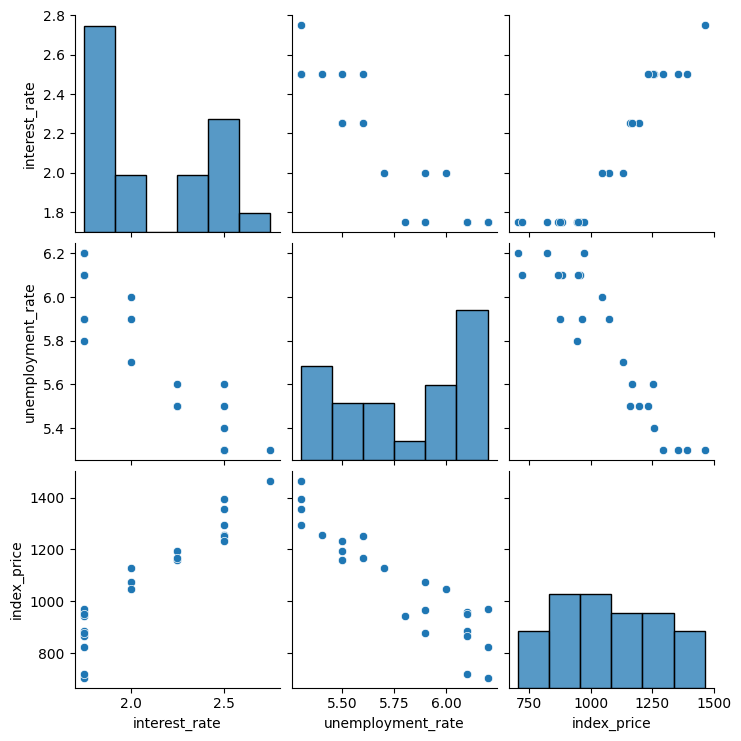

In [5]:
sns.pairplot(df)

In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

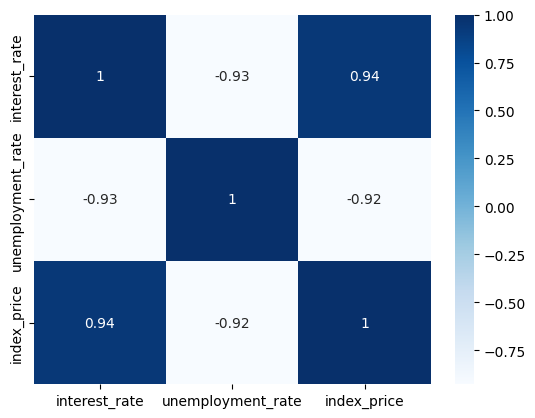

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [13]:
## splitting data
X = df.drop('index_price', axis=1)
y = df['index_price']
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [14]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [15]:
## dividing the data into train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Standard Scaler

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

## Linear Regression

In [21]:
X_train.iloc[:, 0]

13    1.75
1     2.50
21    1.75
5     2.50
2     2.50
12    2.00
15    1.75
3     2.50
4     2.50
22    1.75
17    1.75
20    1.75
23    1.75
7     2.25
10    2.00
14    1.75
19    1.75
6     2.50
Name: interest_rate, dtype: float64

MSE : 5793.762887712569
MAE : 59.935781523235484
RMSE : 76.11677139574805
r2_score : 0.8278978091457145
Adjusted r2_score : 0.7131630152428576


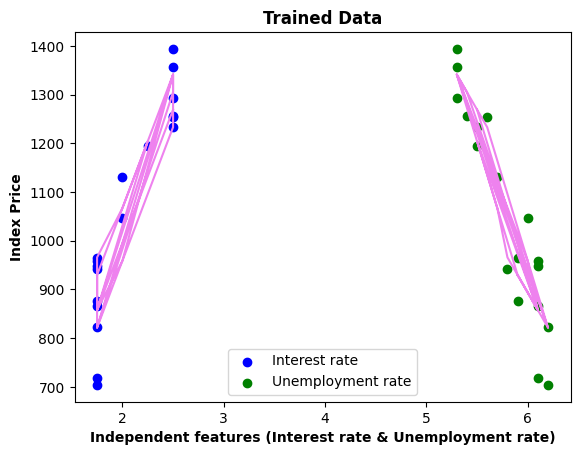

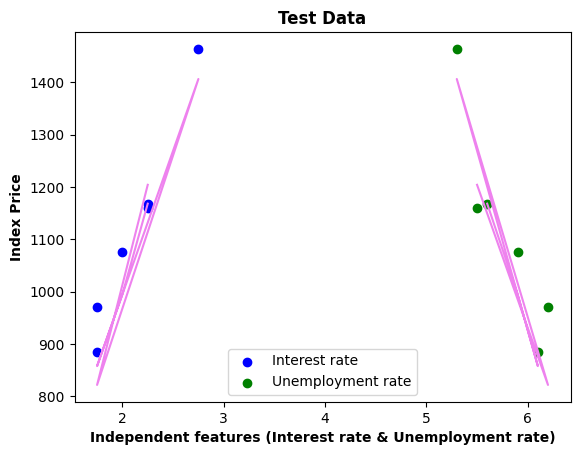

In [27]:
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)
y_pred = regression.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE :", mse)
print("MAE :", mae)
print("RMSE :",rmse)
print("r2_score :", score)
# adjusted r2_score : Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
print("Adjusted r2_score :", 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

# Plot the Interest rate against index_price
plt.scatter(X_train.iloc[:, 0], y_train, color='blue', label='Interest rate')

# Plot the Unemployment rate against index_price
plt.scatter(X_train.iloc[:, 1], y_train, color='green', label='Unemployment rate')

plt.plot(X_train, regression.predict(X_train_scaled), color='violet')

plt.xlabel("Independent features (Interest rate & Unemployment rate)", weight='bold')
plt.ylabel("Index Price", weight='bold')
plt.title("Trained Data", weight='bold')
plt.legend()
plt.show()


## plotting for test data
# Plot the Interest rate against index_price
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Interest rate')

# Plot the Unemployment rate against index_price
plt.scatter(X_test.iloc[:, 1], y_test, color='green', label='Unemployment rate')

plt.plot(X_test, regression.predict(X_test_scaled), color='violet')

plt.xlabel("Independent features (Interest rate & Unemployment rate)", weight='bold')
plt.ylabel("Index Price", weight='bold')
plt.title("Test Data", weight='bold')
plt.legend()
plt.show()

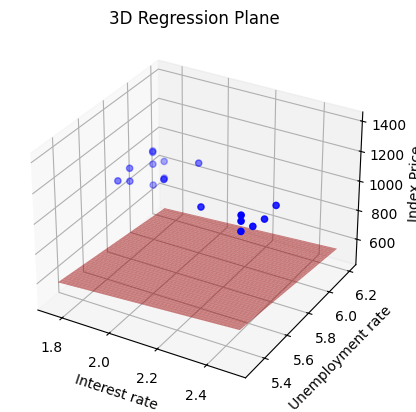

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points for both features
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train, color='blue', label='Data Points')

# Create meshgrid for regression plane
x_surf, y_surf = np.meshgrid(np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 100),
                             np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 100))

# Predict values for the meshgrid points
z_surf = regression.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5, color='red')

ax.set_xlabel('Interest rate')
ax.set_ylabel('Unemployment rate')
ax.set_zlabel('Index Price')
plt.title("3D Regression Plane")
plt.show()


In [30]:
residuals = y_test - y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

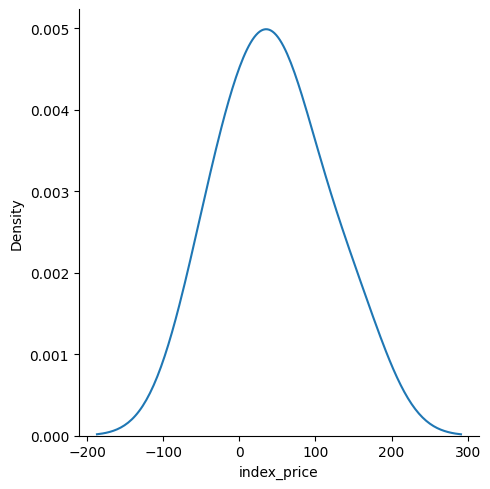

In [31]:
sns.displot(residuals, kind='kde')
plt.show()

## Linear OLS

In [32]:
model = sm.OLS(y_train, X_train_scaled).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 04 Oct 2024   Prob (F-statistic):                       0.754
Time:                        22:20:27   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
regression.coef_

array([  88.27275507, -116.25716066])